In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [57]:
df = pd.read_csv('data/cleanedData_v2.csv')

In [58]:
df['gdp_per_capita'] = df['gdp'] / df['population']
df['greenhouse_gas_emissions_per_capita'] = df['greenhouse_gas_emissions'] / df['population']
df['renewables_consumption_per_capita'] = df['renewables_consumption'] / df['population']


In [59]:
not_to_remove = [ 'year', 'oil_prod_per_capita', 'gas_prod_per_capita', 'coal_prod_per_capita', 'gdp_per_capita', 'renewables_consumption_per_capita', 'greenhouse_gas_emissions_per_capita']
df = df.drop(columns=[col for col in df.columns if (col not in not_to_remove)])
df = df.dropna()
sumOfDataGroupedByYear = df.groupby('year').sum()
sumOfDataGroupedByYear['years'] = sumOfDataGroupedByYear.index

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


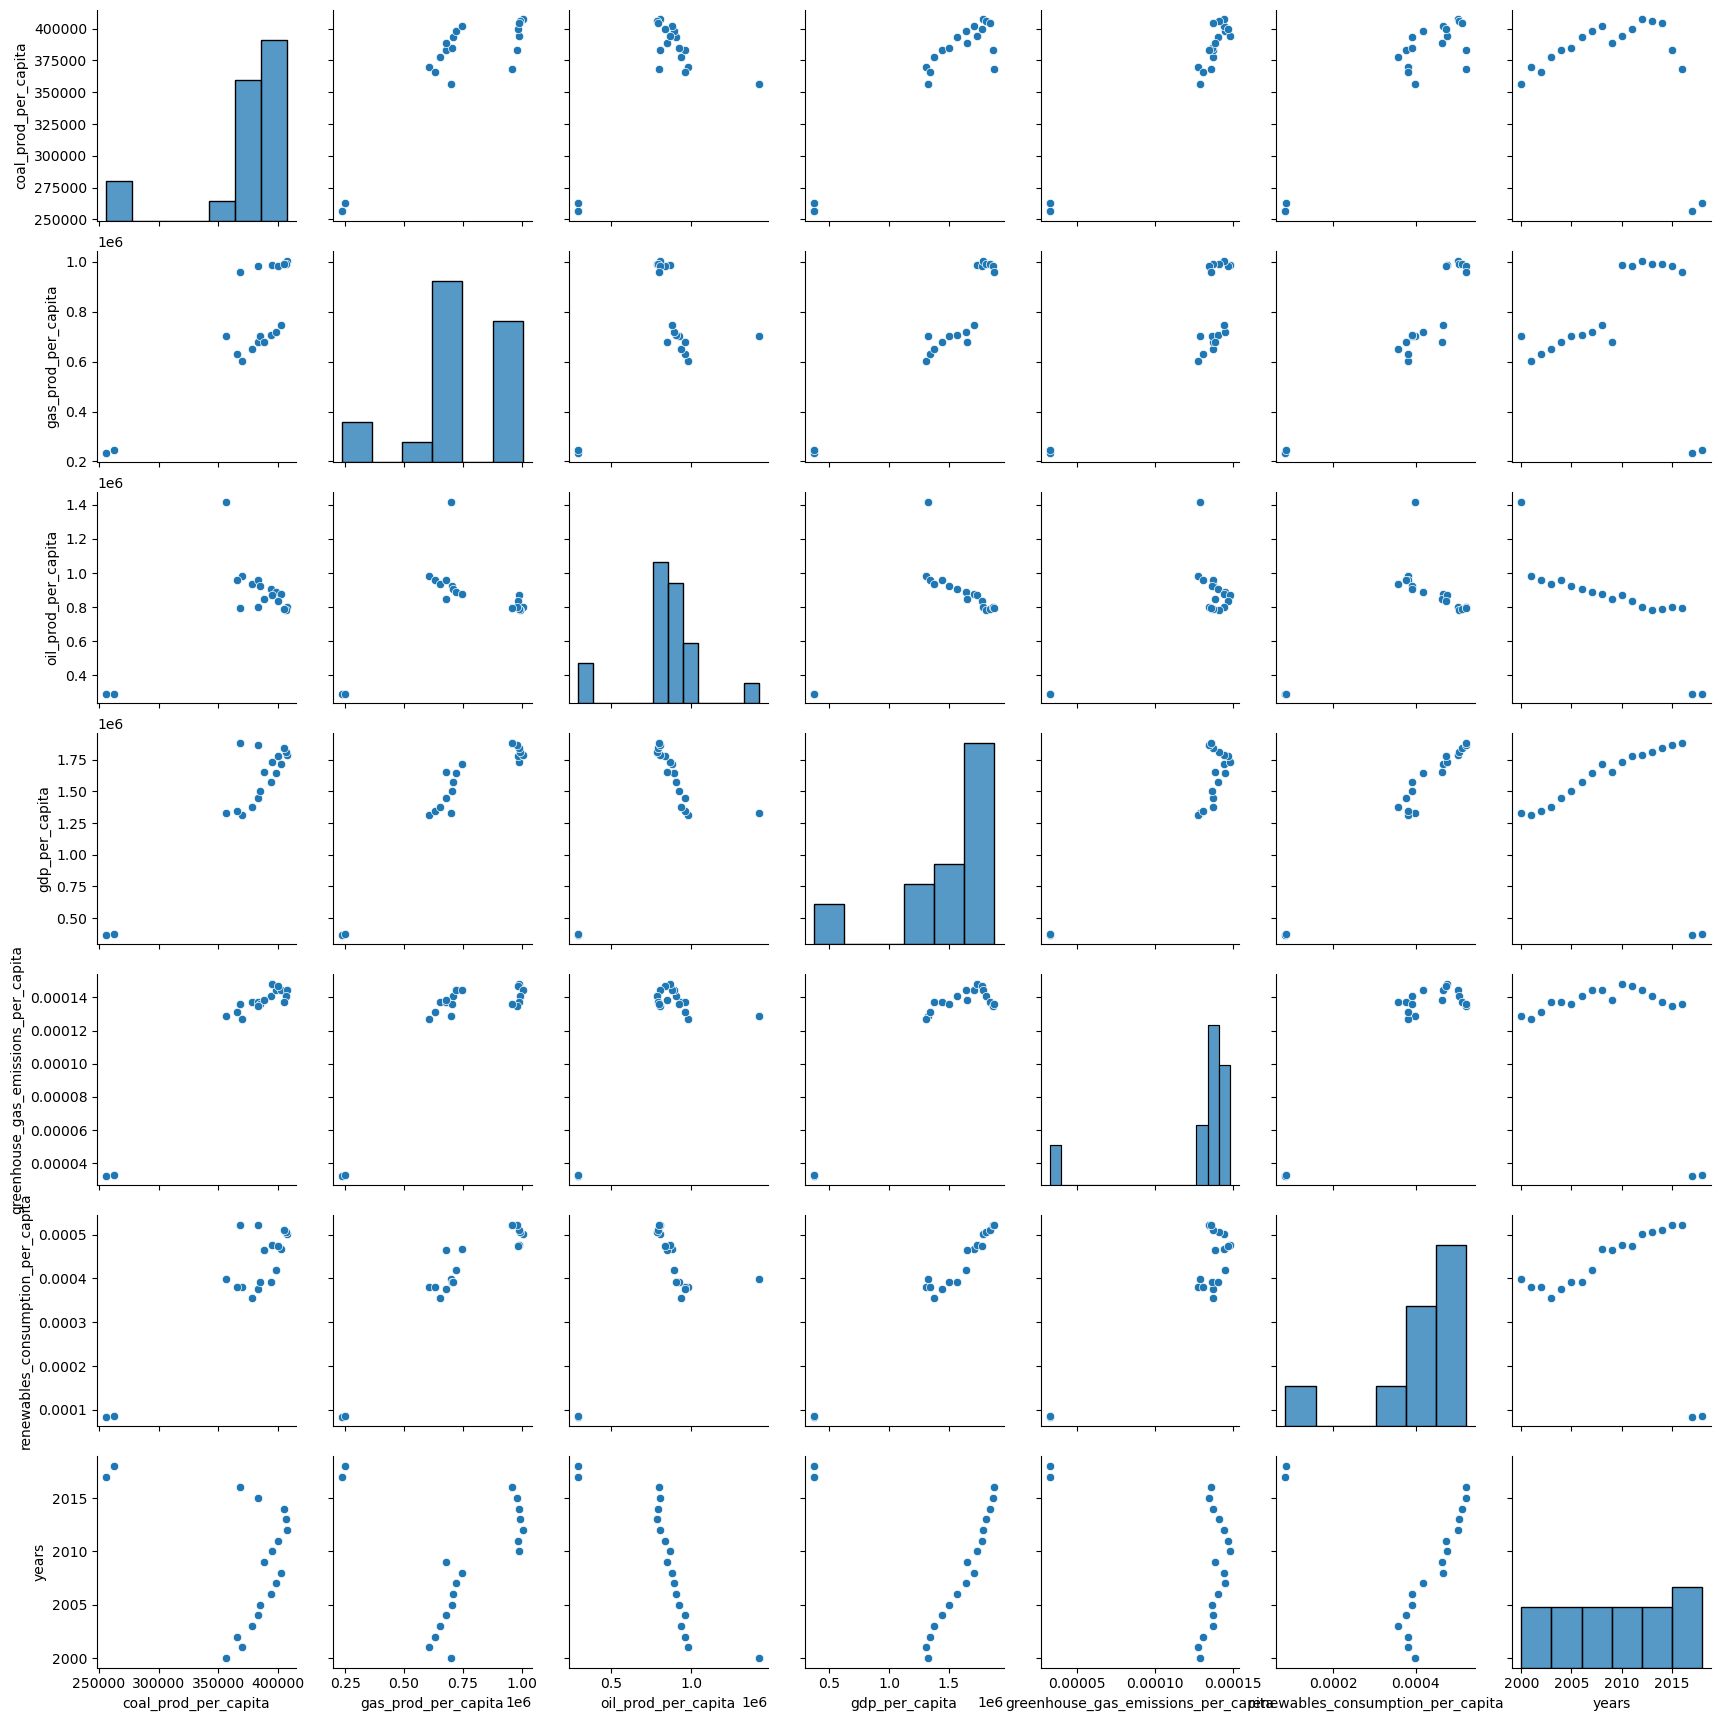

In [60]:
sns.pairplot(sumOfDataGroupedByYear)

<Axes: >

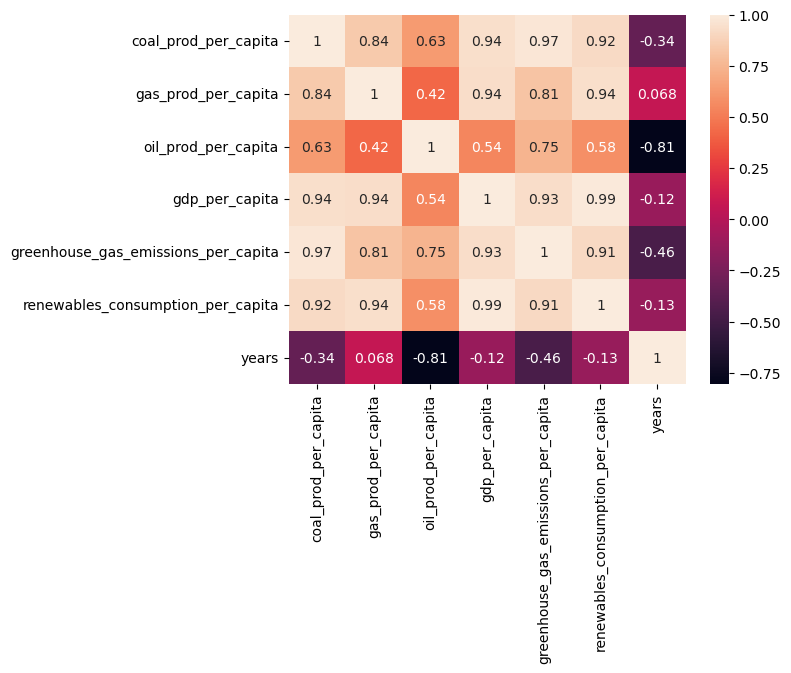

In [61]:
sns.heatmap(sumOfDataGroupedByYear.corr(), annot=True)

In [73]:
YS = [sumOfDataGroupedByYear['oil_prod_per_capita'], sumOfDataGroupedByYear['coal_prod_per_capita'], sumOfDataGroupedByYear['gas_prod_per_capita']]
X = sumOfDataGroupedByYear['years']
X = sm.add_constant(X)

In [74]:
modeloil = sm.OLS(YS[0], X).fit()
# Print model summary
print(modeloil.summary())

                             OLS Regression Results                            
Dep. Variable:     oil_prod_per_capita   R-squared:                       0.651
Model:                             OLS   Adj. R-squared:                  0.630
Method:                  Least Squares   F-statistic:                     31.70
Date:                 Thu, 30 Nov 2023   Prob (F-statistic):           3.00e-05
Time:                         04:46:40   Log-Likelihood:                -251.62
No. Observations:                   19   AIC:                             507.2
Df Residuals:                       17   BIC:                             509.1
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.92e+07   1.21e+07      5.69

d:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [75]:
modelcoal = sm.OLS(YS[1], X).fit()
# Print model summary
print(modelcoal.summary())

                             OLS Regression Results                             
Dep. Variable:     coal_prod_per_capita   R-squared:                       0.115
Model:                              OLS   Adj. R-squared:                  0.062
Method:                   Least Squares   F-statistic:                     2.199
Date:                  Thu, 30 Nov 2023   Prob (F-statistic):              0.156
Time:                          04:46:42   Log-Likelihood:                -227.95
No. Observations:                    19   AIC:                             459.9
Df Residuals:                        17   BIC:                             461.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.555e+06   3.49e+06

d:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [76]:
modelgas = sm.OLS(YS[2], X).fit()
# Print model summary
print(modelgas.summary())

                             OLS Regression Results                             
Dep. Variable:     coal_prod_per_capita   R-squared:                       0.115
Model:                              OLS   Adj. R-squared:                  0.062
Method:                   Least Squares   F-statistic:                     2.199
Date:                  Thu, 30 Nov 2023   Prob (F-statistic):              0.156
Time:                          04:46:44   Log-Likelihood:                -227.95
No. Observations:                    19   AIC:                             459.9
Df Residuals:                        17   BIC:                             461.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.555e+06   3.49e+06

d:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [82]:
modelRen = sm.OLS( sumOfDataGroupedByYear['renewables_consumption_per_capita'],X).fit()
# Print model summary
print(modelRen.summary())

                                    OLS Regression Results                                   
Dep. Variable:     renewables_consumption_per_capita   R-squared:                       0.016
Model:                                           OLS   Adj. R-squared:                 -0.042
Method:                                Least Squares   F-statistic:                    0.2781
Date:                               Thu, 30 Nov 2023   Prob (F-statistic):              0.605
Time:                                       04:49:14   Log-Likelihood:                 144.31
No. Observations:                                 19   AIC:                            -284.6
Df Residuals:                                     17   BIC:                            -282.7
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                 coef    std err          t      P>|t|      

d:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


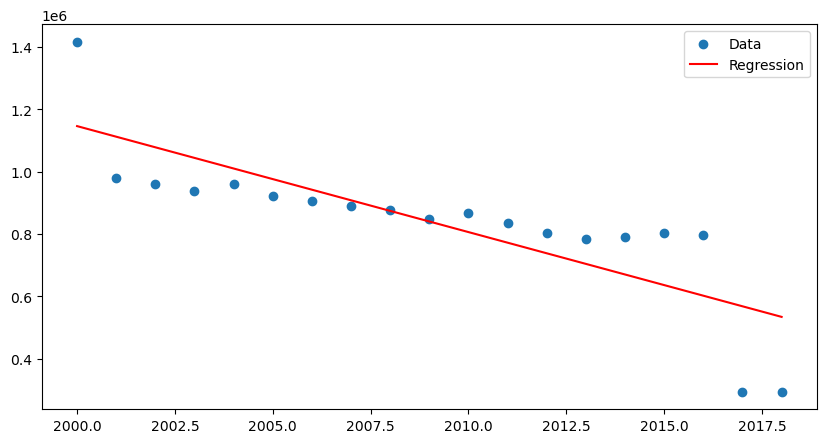

In [79]:
predicted_values = modeloil.predict(X)

# Plot the original data and the regression curve
plt.figure(figsize=(10, 5))
plt.scatter(sumOfDataGroupedByYear['years'], sumOfDataGroupedByYear['oil_prod_per_capita'], label='Data')
plt.plot(sumOfDataGroupedByYear['years'], predicted_values, color='red', label='Regression')
plt.legend()
plt.show()

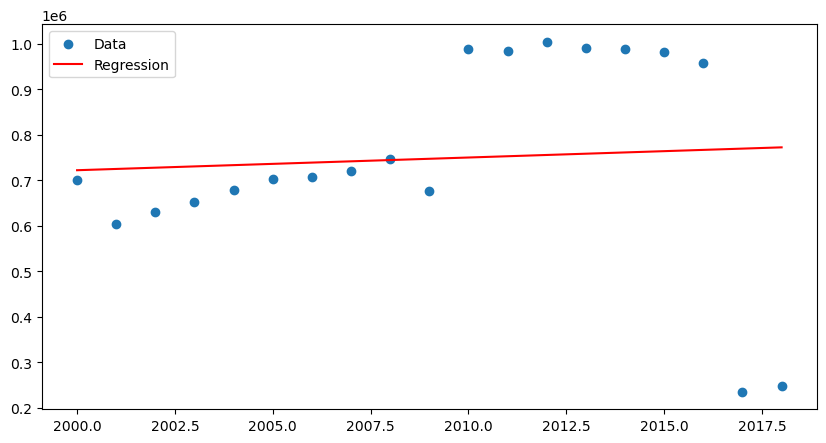

In [80]:
predicted_values = modelgas.predict(X)

# Plot the original data and the regression curve
plt.figure(figsize=(10, 5))
plt.scatter(sumOfDataGroupedByYear['years'], sumOfDataGroupedByYear['gas_prod_per_capita'], label='Data')
plt.plot(sumOfDataGroupedByYear['years'], predicted_values, color='red', label='Regression')
plt.legend()
plt.show()

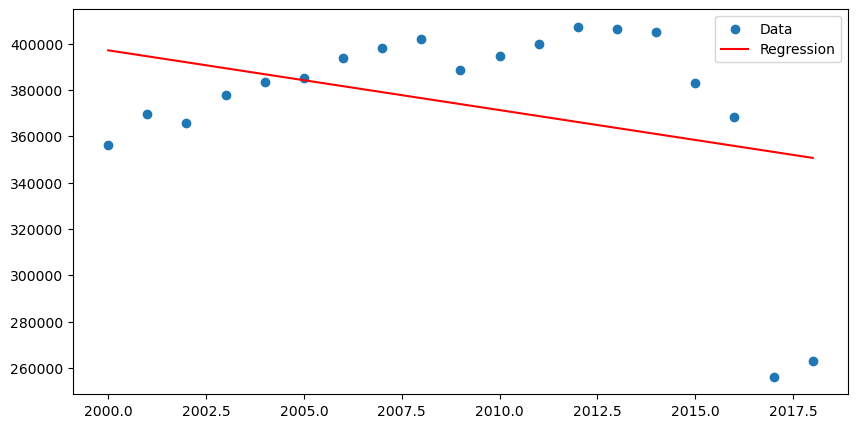

In [83]:
predicted_values = modelcoal.predict(X)

# Plot the original data and the regression curve
plt.figure(figsize=(10, 5))
plt.scatter(sumOfDataGroupedByYear['years'], sumOfDataGroupedByYear['coal_prod_per_capita'], label='Data')
plt.plot(sumOfDataGroupedByYear['years'], predicted_values, color='red', label='Regression')
plt.legend()
plt.show()